### Questions

### Objectives
YWBAT
* define linear regression
* describe what the various parts do in regards to the linreg equation
* calculate the error of a linear regression equation
* graph residuals and discuss heteroskedacicity

### Outline
* discuss linear regression and it's use cases
* mock up some data
* run ols on it
    * statsmodels
    * score using r2
    * score r2 by hand comparing the 2 equations
* summarize our sm ols summary

### What is linear regression?
fitting a line y_hat = mx + b to some data points (x vs y), such that our line has minimal error in predicting y values.

Linear Regression - takes data (x and y values), plotting them on a graph.  Using y = mx + b to determine the slope and draw a line through the points.  Then determine the error. 

How one variable effects another variable.

![](linregimage.png)

### When do we use it?
When there are two variables that are related

Almost never

### Let's discuss the assumptions of OLS first

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.xkcd()

### Assumptions
Features
- Linear relationship between features and target
- No multicollinearity of features with target

Residuals
- Residuals are normally distributed
- Residuals have homoskedacicity
- Exogeneity which is basically what the 2 above assumptions complete
- Errors are normally distributed amongst the errors as well


[Read more here](https://en.wikipedia.org/wiki/Ordinary_least_squares#Assumptions)

### Let's discuss multicollinearity real quick

In [31]:
best_y_hat = bias + slope*x_vals

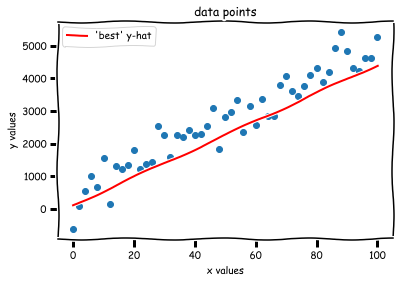

In [32]:
plt.scatter(x_vals, y_vals)
plt.plot(x_vals, best_y_hat, c='r', label="'best' y-hat")
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("data points")
plt.legend()
plt.show()

In [33]:
r2_score(y_vals, ols_y_hat), r2_score(y_vals, best_y_hat)

(0.9124591462850884, 0.8084292762921518)

In [34]:
residuals_ols = y_vals - ols_y_hat
residuals_best = y_vals - best_y_hat

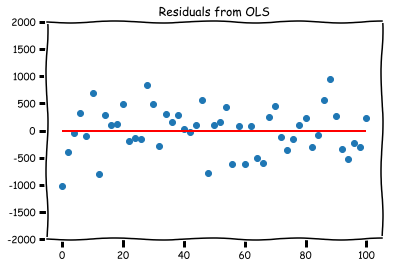

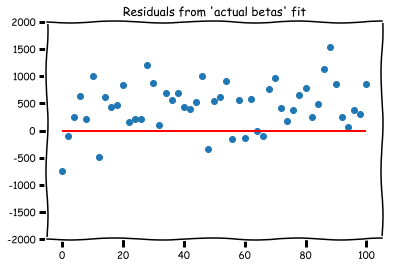

In [35]:
plt.scatter(x_vals, residuals_ols)
plt.title("Residuals from OLS")
plt.hlines(xmin=0, xmax=100, color='r', y=0)
plt.ylim([-2000, 2000])
plt.show()

plt.scatter(x_vals, residuals_best)
plt.title("Residuals from 'actual betas' fit")
plt.hlines(xmin=0, xmax=100, color='r', y=0)
plt.ylim([-2000, 2000])
plt.show()

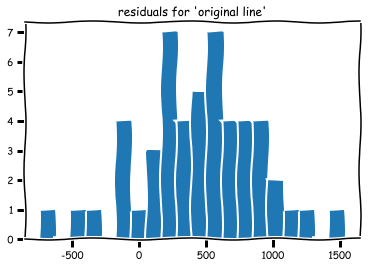

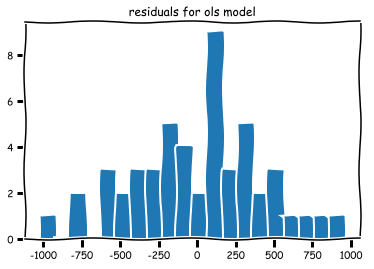

In [36]:
plt.hist(residuals_best, bins=20)
plt.title("residuals for 'original line'")
plt.show()

plt.hist(residuals_ols, bins=20)
plt.title("residuals for ols model")
plt.show()

### Estimation using the $\hat{m}$ approxmiation
$$\hat{m} = \rho \frac{\sigma_y}{\sigma_x}$$

$$\hat{m} = \frac{\overline{x}\times\overline{y}-\overline{xy}}{\big(\overline{x}\big)^2-\overline{x^2}}$$

In [46]:
# formula 1
rho = np.corrcoef(x_vals, y_vals)[0, 1]
num = y_vals.std()
den = x_vals.std()

m_hat = rho * num/den
m_hat

46.38009069905847

In [48]:
# formula 2
num = x_vals.mean()*y_vals.mean() - np.mean(x_vals*y_vals)
den = x_vals.mean()**2 - np.mean(x_vals**2)
m_hat = num/den
m_hat

46.380090699058435

In [49]:
# Let's try this slope out!!!

In [57]:
y_trial.shape

(51, 2)

In [59]:
y_trial = m_hat * x_vals
r2_score(y_vals, y_trial)

0.8379546115943945

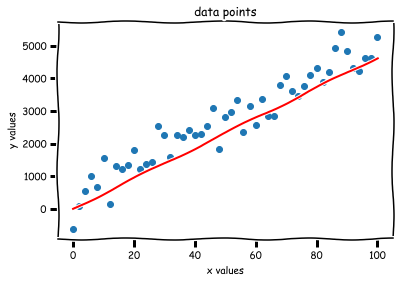

In [60]:
plt.scatter(x_vals, y_vals)
plt.plot(x_vals, y_trial, c='r')
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("data points")
plt.show()

# Though our r2 is nice and high at 0.84...
We should be careful because our line sits under most of our data, we can see this through a residual plot

In [61]:
residuals_from_trial = y_trial - y_vals

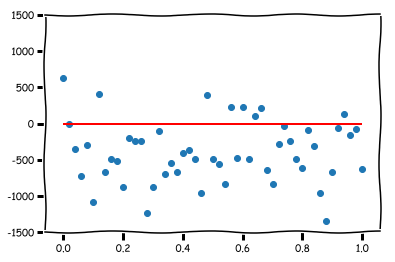

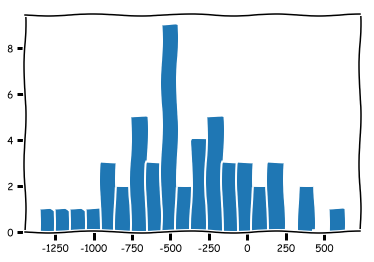

In [62]:
plot_residuals(residuals_from_trial)

### what did we learn?